In [ ]:
# PEMASANGAN MODUL INKOVIS
!wget -O inkovis.py "https://github.com/taruma/inkovis/raw/master/notebook/inkovis.py" -q
!wget -O so.py "https://github.com/taruma/inkovis/raw/master/notebook/so.py" -q

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import inkovis

DATASET

In [ ]:
# IMPORT DATASET DARI KAGGLE
dataset_kaggle = pd.read_csv('/content/cases.csv', index_col=0, parse_dates=True)
dataset_kaggle.head()

,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated,new_released,acc_released,new_deceased,acc_deceased,positive_rate,negative_rate,decease_rate,release_rate,dailypositive_rate
date,,,,,,,,,,,,,,,,
2020-03-02,NaN,339,2,2,335,2,2,0,0,0,0,0.59%,98.82%,0.00%,0.00%,0.00%
2020-03-03,2.0,341,0,2,337,2,2,0,0,0,0,0.59%,98.83%,0.00%,0.00%,0.00%
2020-03-04,31.0,372,0,2,356,14,2,0,0,0,0,0.54%,95.70%,0.00%,0.00%,0.00%
2020-03-05,16.0,388,0,2,371,15,2,0,0,0,0,0.52%,95.62%,0.00%,0.00%,0.00%
2020-03-06,62.0,450,2,4,422,24,4,0,0,0,0,0.89%,93.78%,0.00%,0.00%,3.23%


In [ ]:
_kaggle_col_names = 'acc_tested acc_confirmed acc_released acc_deceased acc_negative being_checked'.split()
_inkovis_col_names = 'jumlah_periksa konfirmasi sembuh meninggal negatif proses_periksa'.split() 

dataset_inkovis = dataset_kaggle[_kaggle_col_names].copy().dropna().astype(int)
dataset_inkovis.columns = _inkovis_col_names
dataset_inkovis.index.name = 'tanggal'
dataset_inkovis.tail()

,jumlah_periksa,konfirmasi,sembuh,meninggal,negatif,proses_periksa
tanggal,,,,,,
2020-03-27,5775,1046,46,87,4729,0
2020-03-28,6266,1155,59,102,5111,0
2020-03-29,6534,1285,64,114,5249,0
2020-03-30,6663,1414,75,122,5249,0
2020-03-31,6777,1528,81,136,5249,0


VISUALISASI

In [ ]:
# PENGATURAN PARAMS VISUALISASI
FIG_SIZE = (20, 8)
FIG_SIZE_GROUP = (20, 12)

# PARAM FUNGSI
DATASET = dataset_inkovis
MASK = None
DAYS = 1

KASUS KONFIRMASI

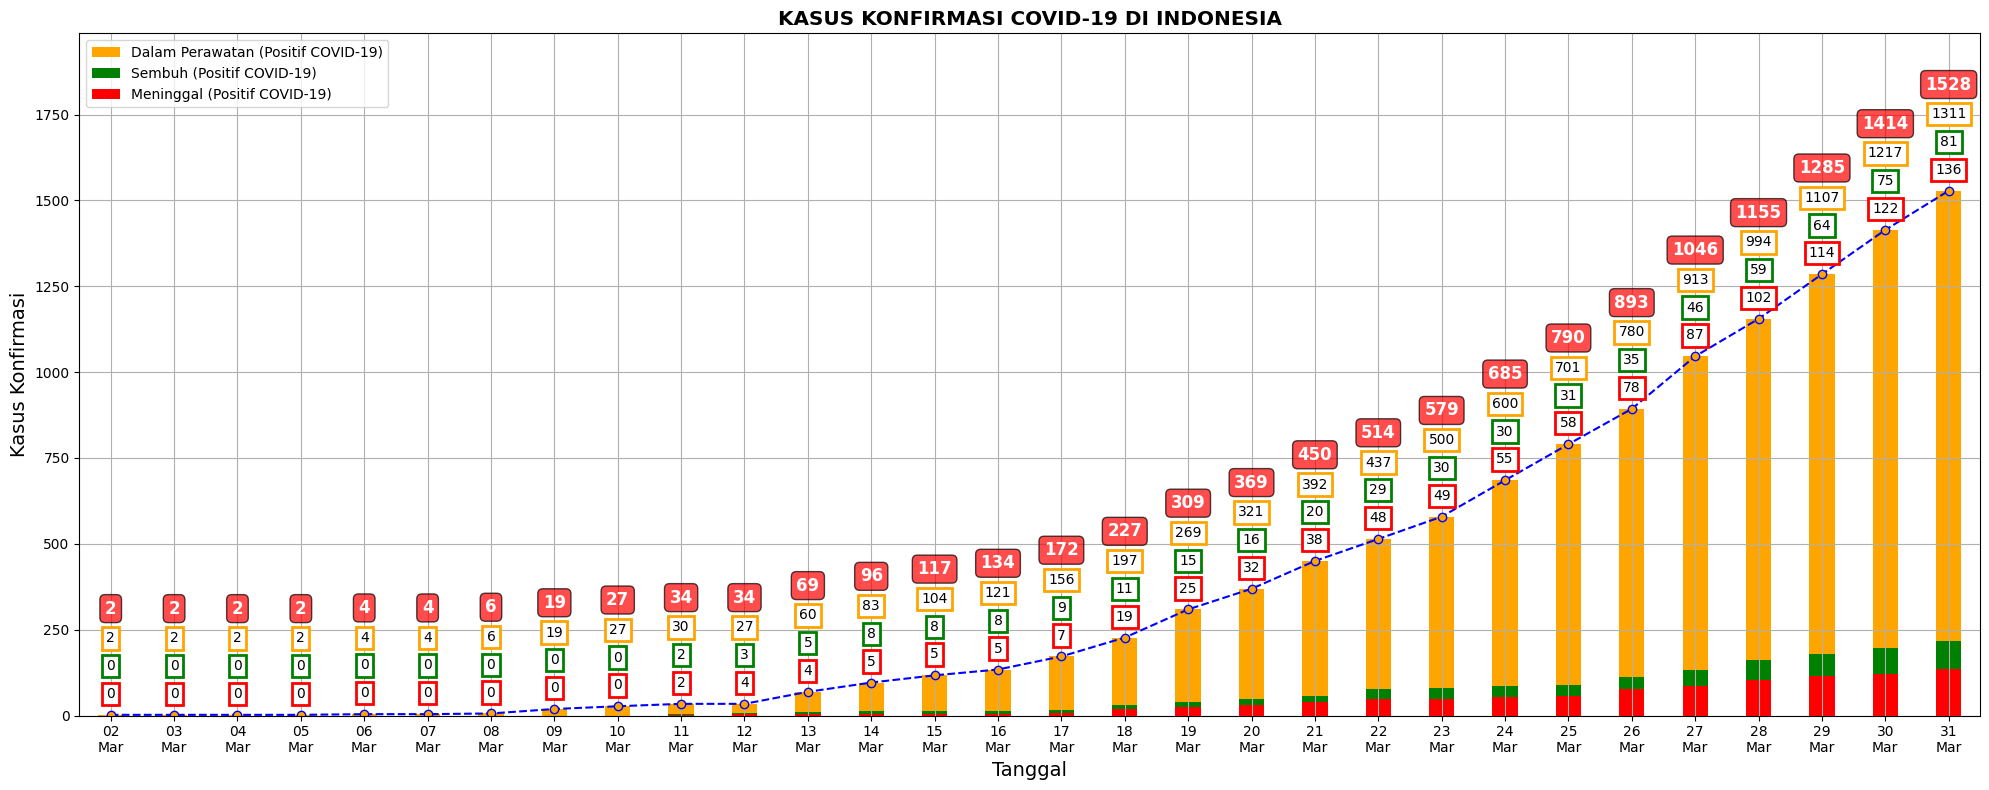

In [ ]:
fig, ax = plt.subplots(figsize=FIG_SIZE)

inkovis.plot_confirmed_case(
    dataset=DATASET, ax=ax, mask=MASK, days=DAYS,
    show_diff_numbers=False, show_hist=True,
    show_diff_bar=False,
    show_info=False
)

plt.savefig('KASUS_KONFIRMASI_HARIAN.png', dpi=150)

JUMLAH SPESIMEN

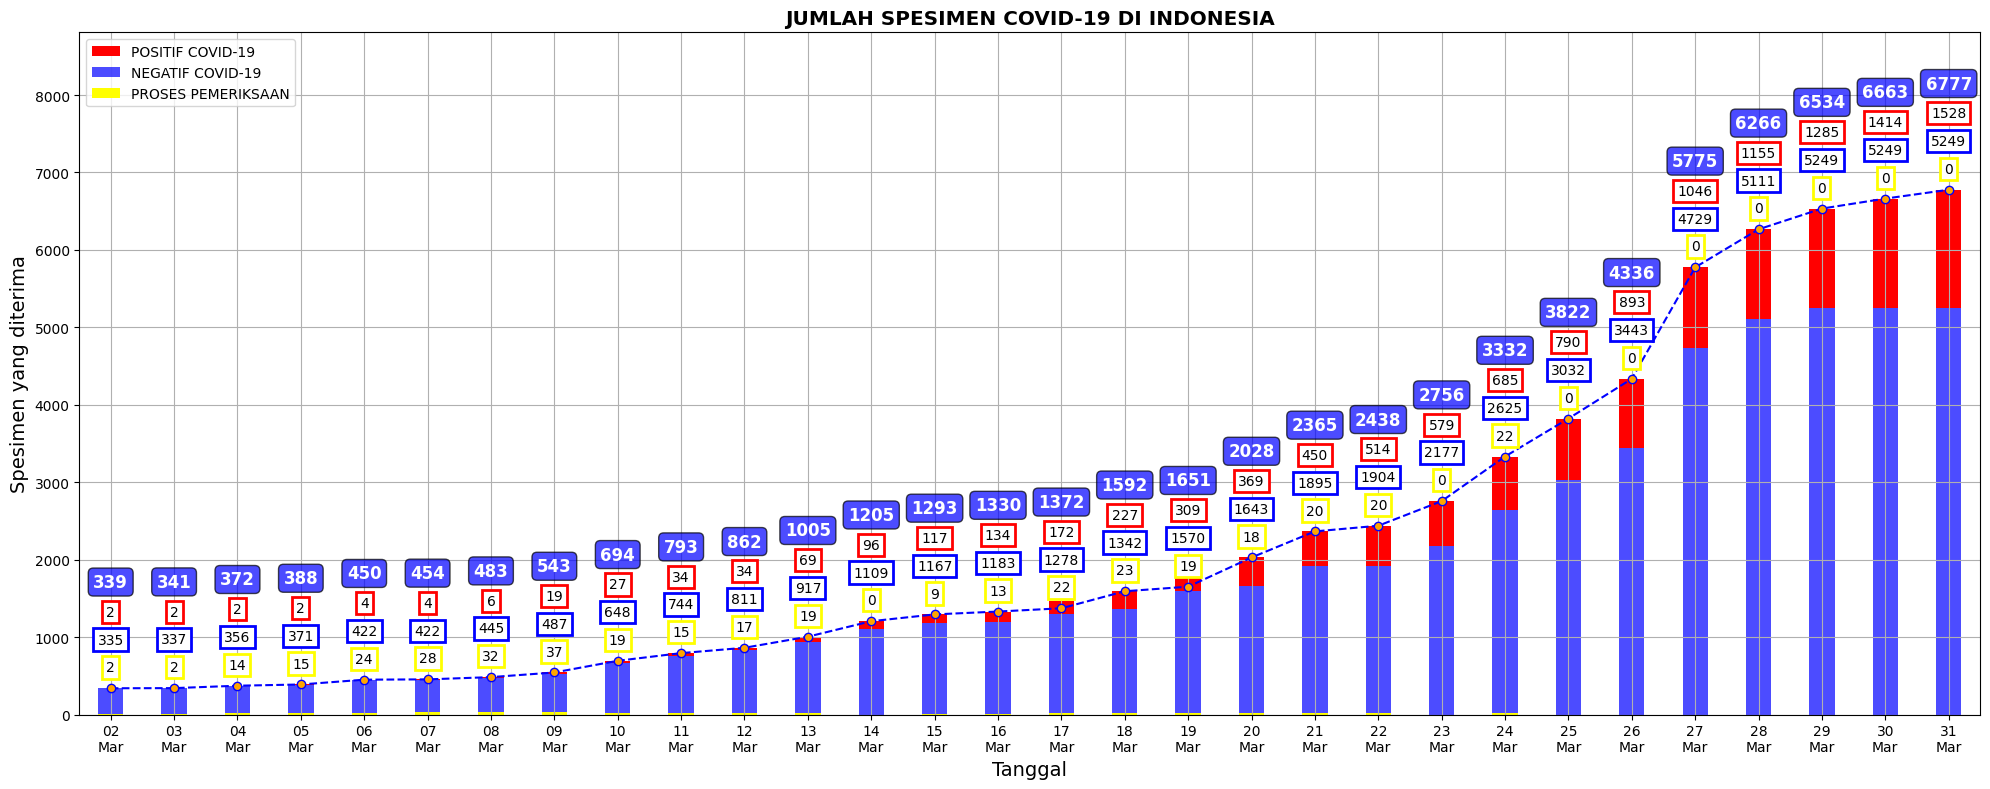

In [ ]:
fig, ax = plt.subplots(figsize=FIG_SIZE)

inkovis.plot_testing_case(
    dataset=DATASET, ax=ax, mask=MASK, days=DAYS,
    show_diff_numbers=False, show_hist=True,
    show_diff_bar=False,
    show_info=False)

plt.savefig('JUMLAH_SPESIMEN_HARIAN.png', dpi=150)

PERKEMBANGAN KASUS KONFIRMASI

/content/inkovis.py:642: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([f'{abs(x):.0f}' for x in ax2.get_yticks()])
/content/inkovis.py:675: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{abs(x):.0f}' for x in ax.get_yticks()])


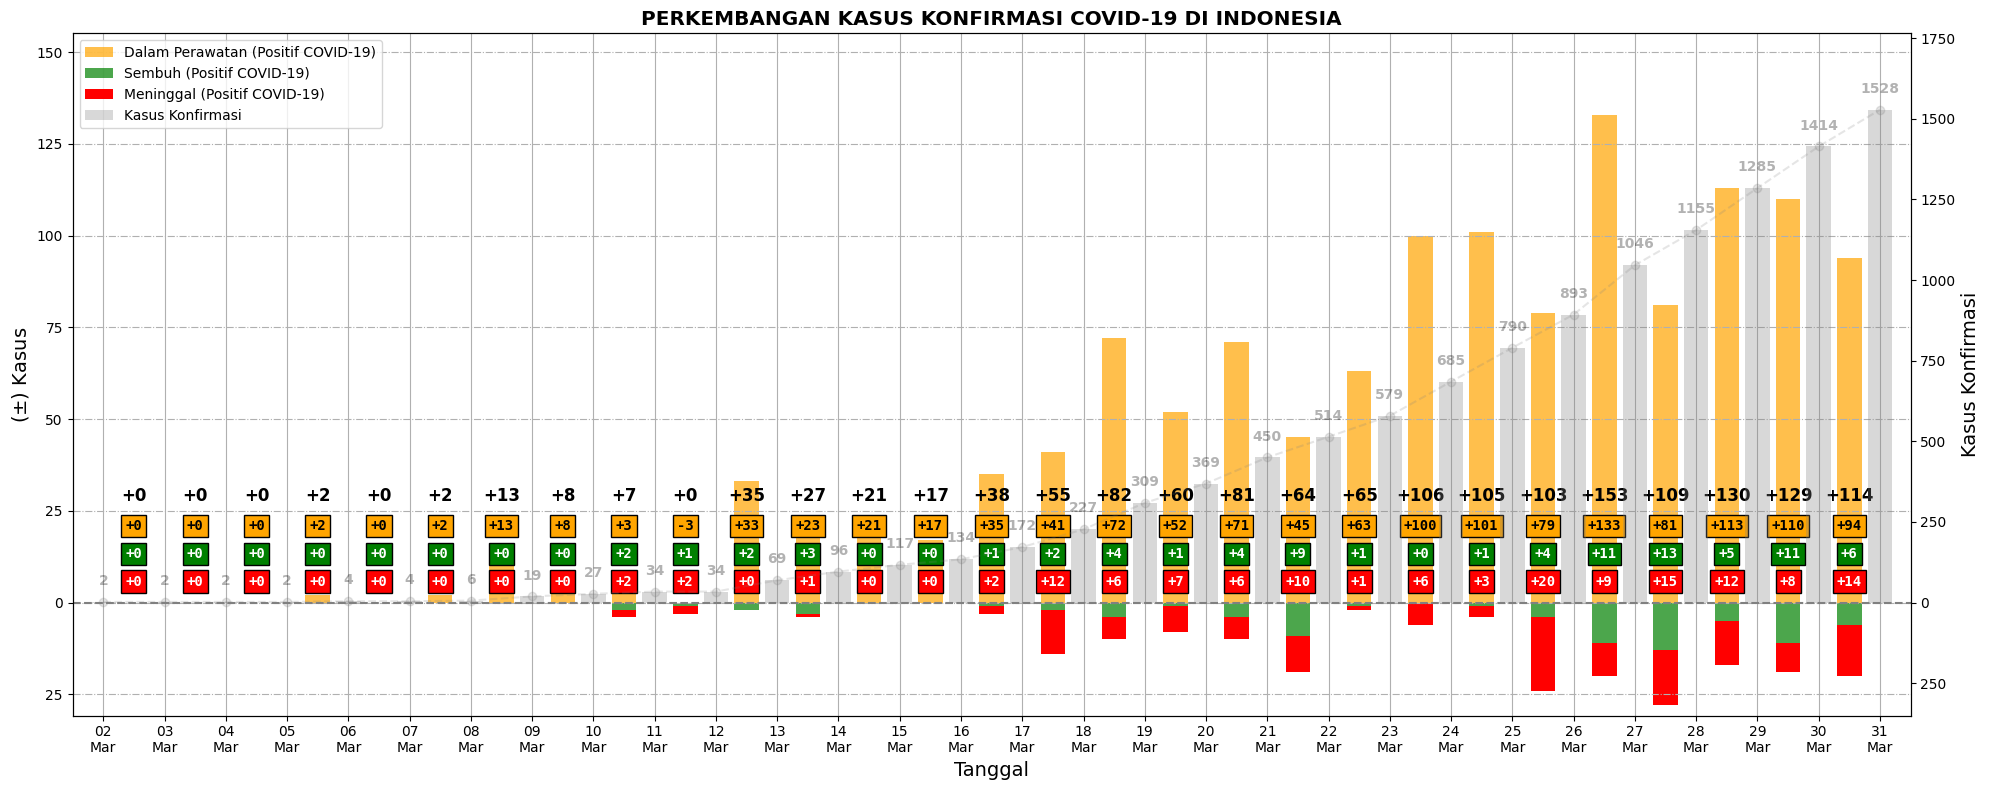

In [ ]:
fig, ax = plt.subplots(figsize=FIG_SIZE)
inkovis.plot_confirmed_growth(
    dataset=DATASET, ax=ax, mask=MASK, days=DAYS,
    show_info=False,
    show_confirmed=True, show_confirmed_numbers=True)

plt.savefig('PERKEMBANGAN_KASUS_KONFIRMASI_HARIAN.png', dpi=150)

PERKEMBANGAN JUMLAH SPESIME

/content/inkovis.py:862: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([f'{abs(x):.0f}' for x in ax2.get_yticks()])
/content/inkovis.py:896: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{abs(x):.0f}' for x in ax.get_yticks()])


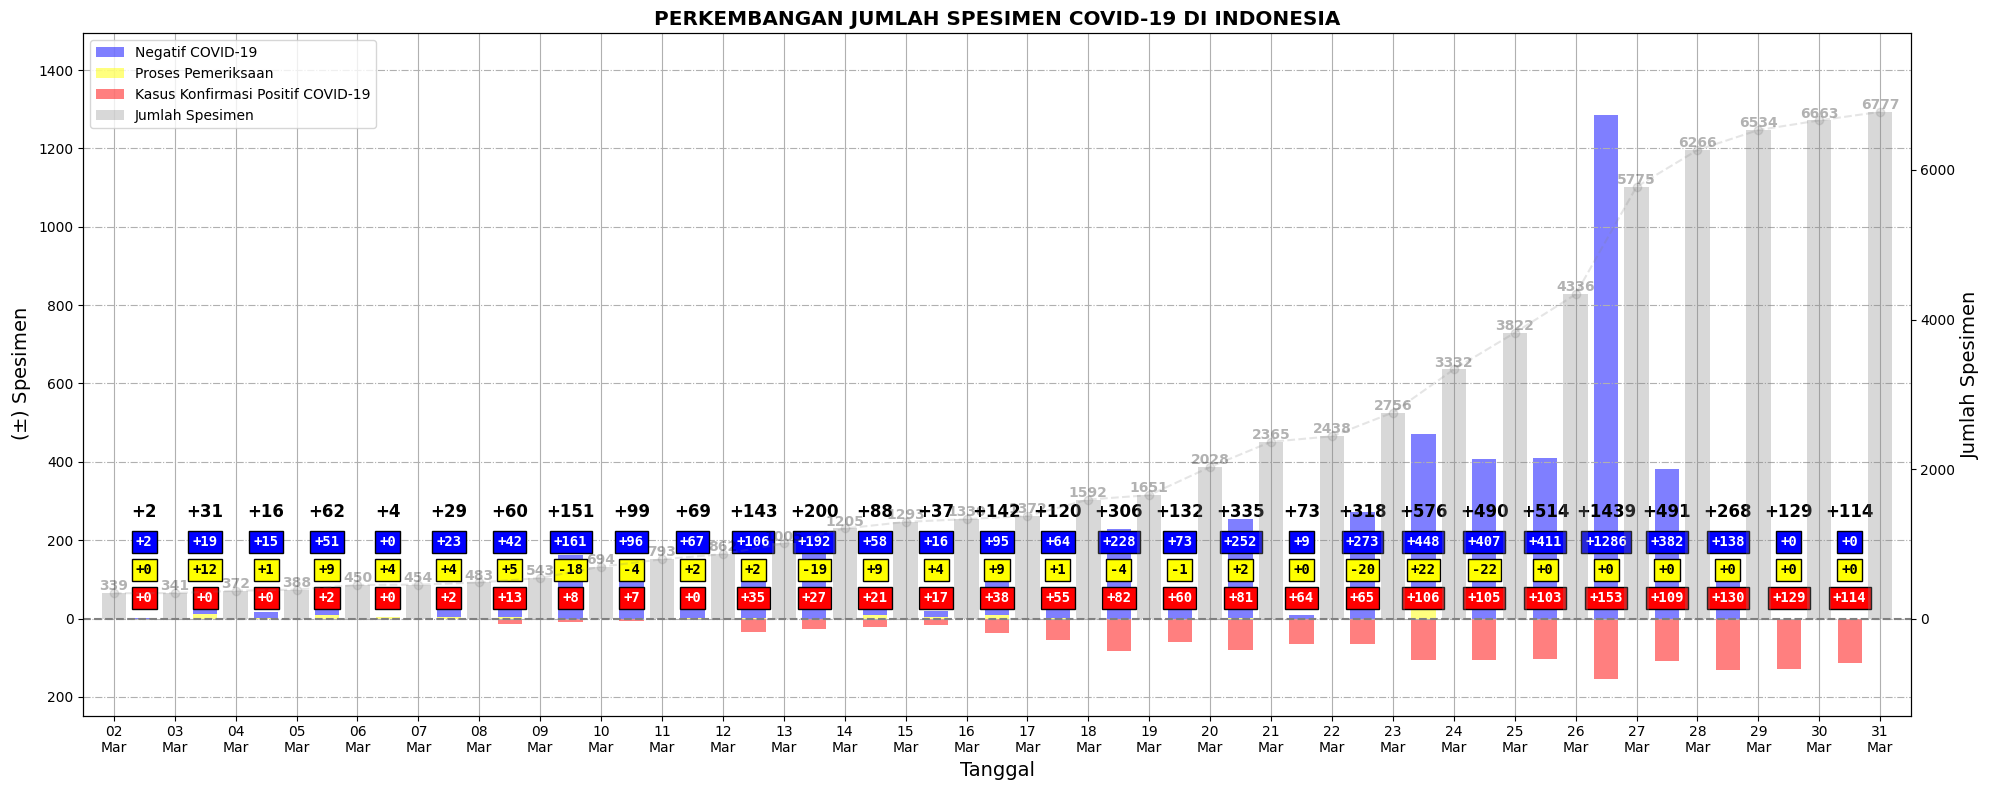

In [ ]:
fig, ax = plt.subplots(figsize=FIG_SIZE)
inkovis.plot_testing_growth(
    dataset=DATASET, ax=ax, mask=MASK, days=DAYS,
    show_info=False,
    show_confirmed=True)

plt.savefig('PERKEMBANGAN_JUMLAH_SPESIMEN_HARIAN.png', dpi=150)

KASUS KONFIRMASI DAN PERKEMBANGANNYA

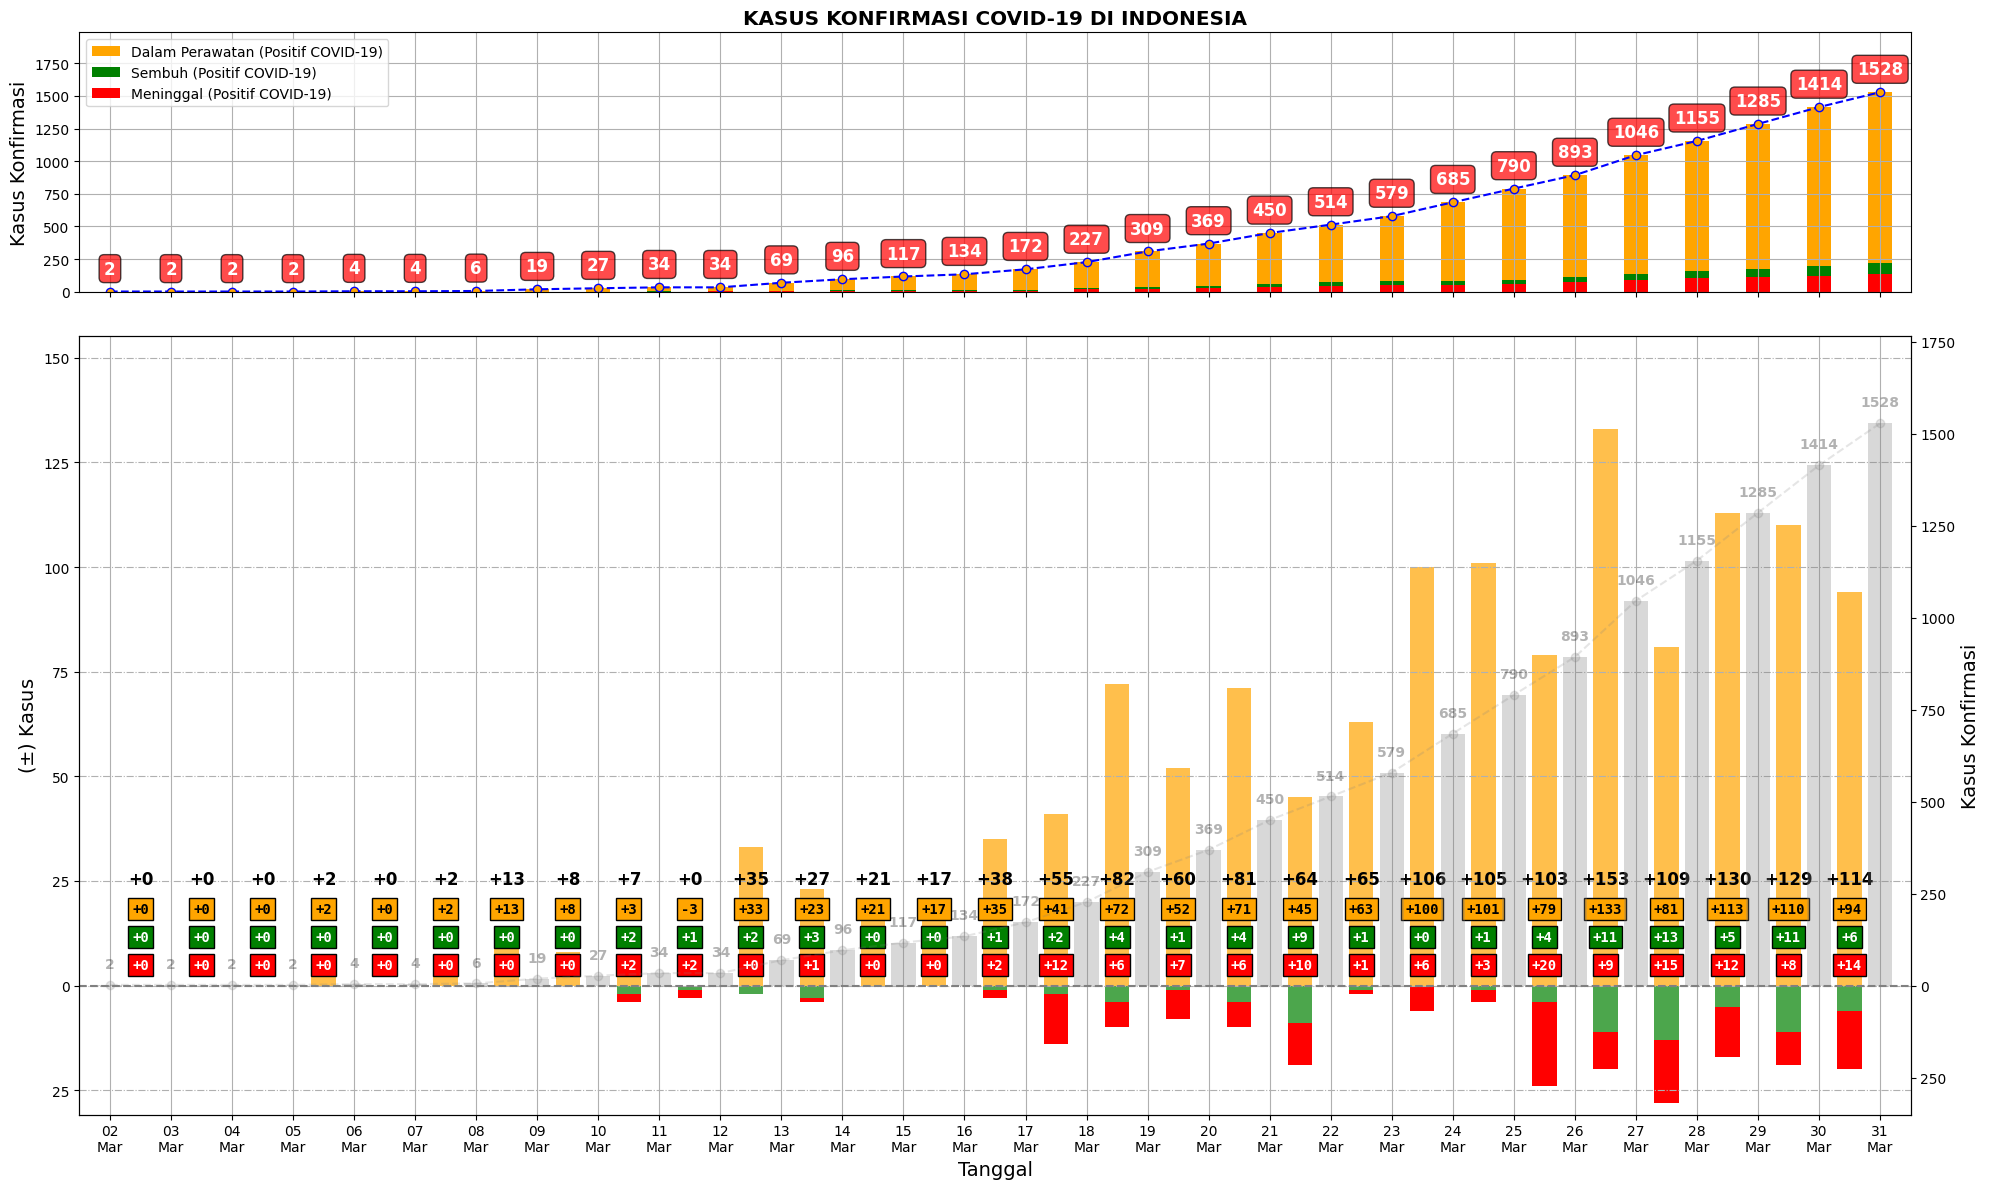

In [ ]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=FIG_SIZE_GROUP, sharex=True,
    gridspec_kw={'height_ratios':[1, 3]})

inkovis.plot_confirmed_case(
    dataset=DATASET, ax=ax[0], mask=MASK, days=DAYS,
    show_diff_bar=False, show_info=False, show_hist=False
)

inkovis.plot_confirmed_growth(
    dataset=DATASET, ax=ax[1], mask=MASK, days=DAYS,
    show_bar=True, show_confirmed=True, 
    show_numbers=True,
    show_total_numbers=True, show_title=False, show_info=False,
    show_legend=False
)
ax[0].set_xlabel('');

plt.savefig('KONFIRMASI_PERKEMBANGAN_HARIAN.png', dpi=150)

JUMLAH SPESIMEN DAN PERKEMBANGANNYA

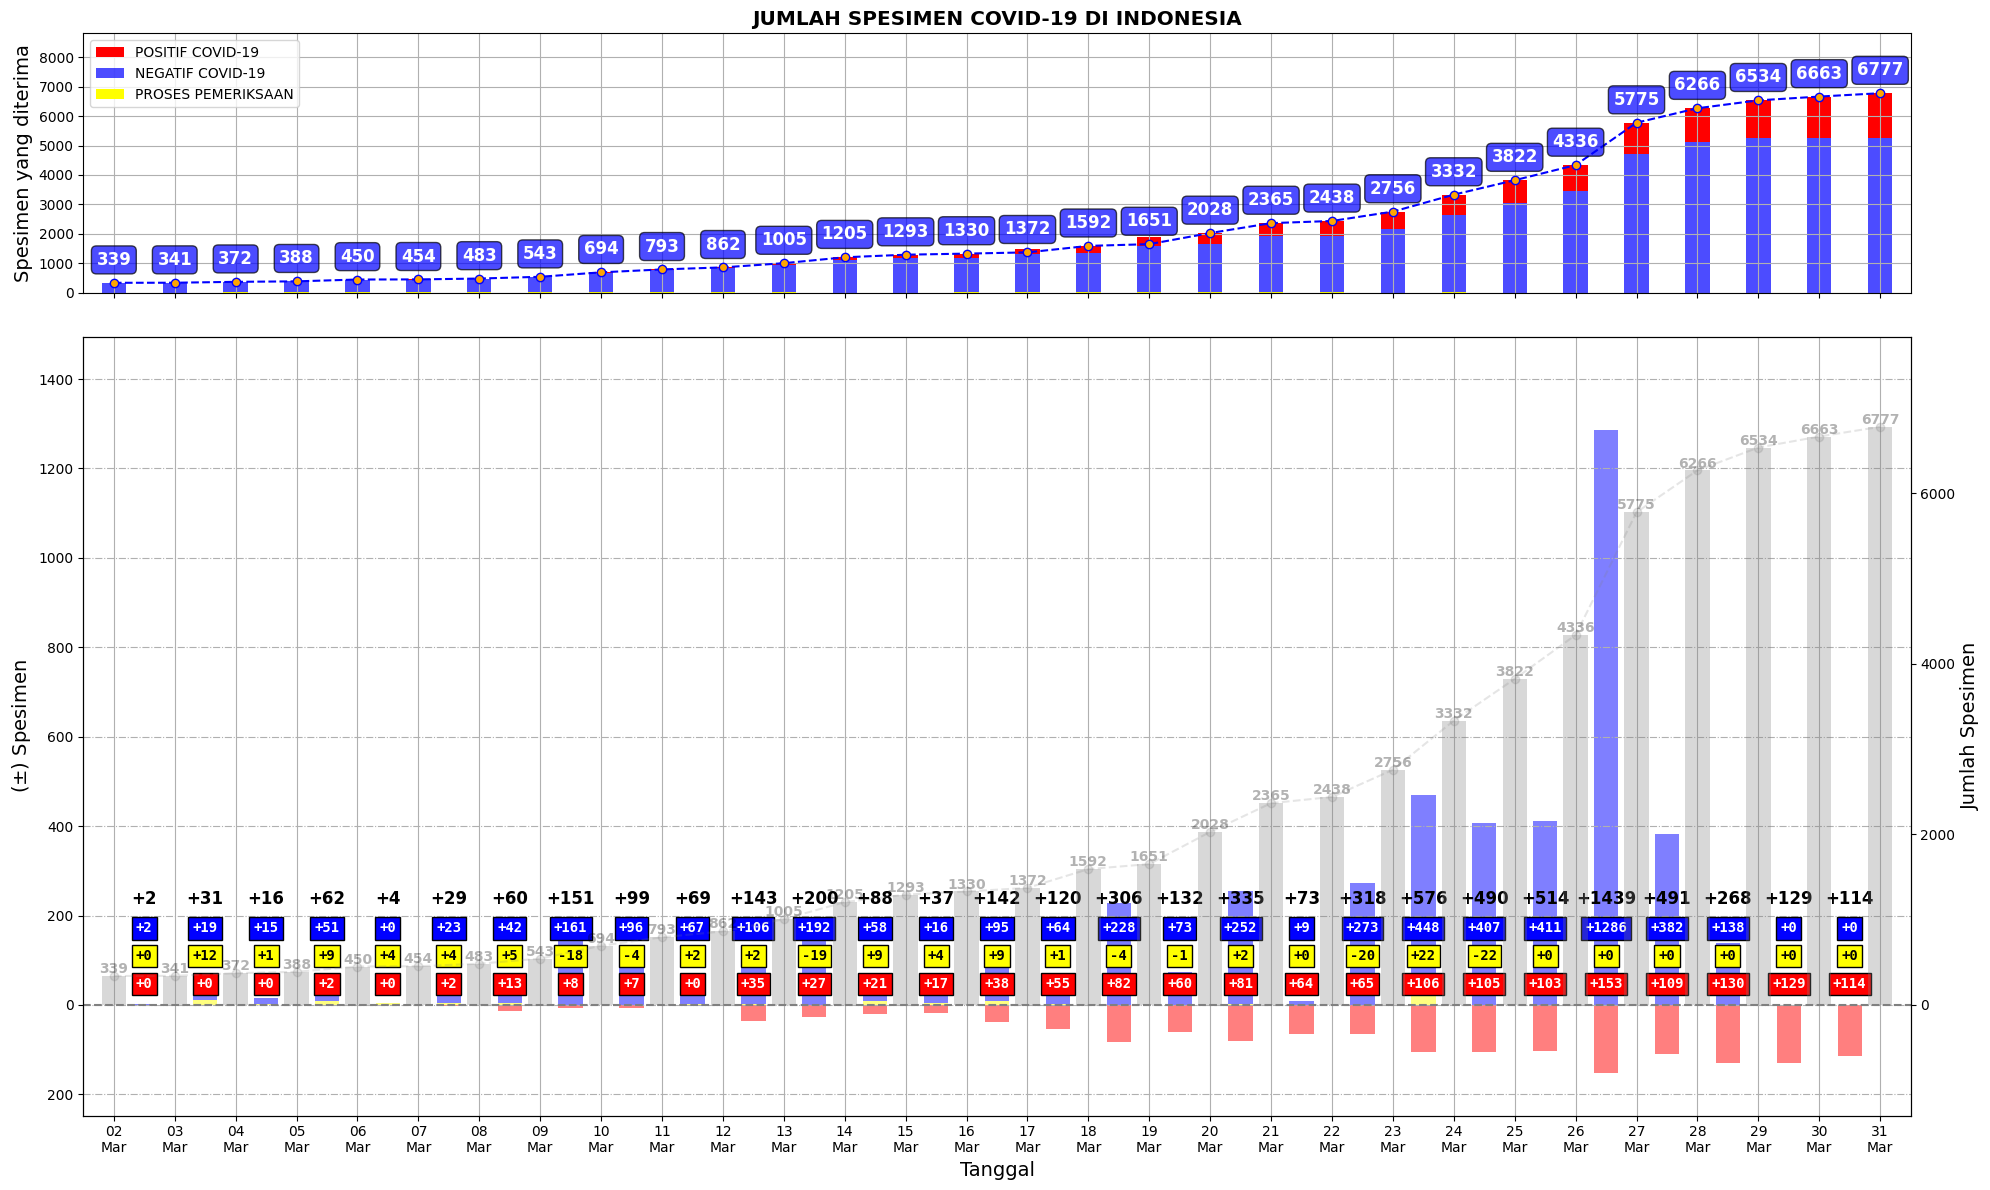

In [ ]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=FIG_SIZE_GROUP, sharex=True,
    gridspec_kw={'height_ratios':[1, 3]})

inkovis.plot_testing_case(
    dataset=DATASET, ax=ax[0], mask=MASK, days=DAYS,
    show_diff_bar=False, show_info=False, show_hist=False
)

inkovis.plot_testing_growth(
    dataset=DATASET, ax=ax[1], mask=MASK, days=DAYS,
    show_bar=True, show_confirmed=True, 
    show_numbers=True,
    show_total_numbers=True, show_title=False, show_info=False,
    show_legend=False
)

ax[0].set_xlabel('');
plt.savefig('SPESIMEN_PERKEMBANGAN_HARIAN.png', dpi=150)

AKUMULASI TOTAL

KASUS KONFIRMASI DAN JUMLAH SPESIMEN

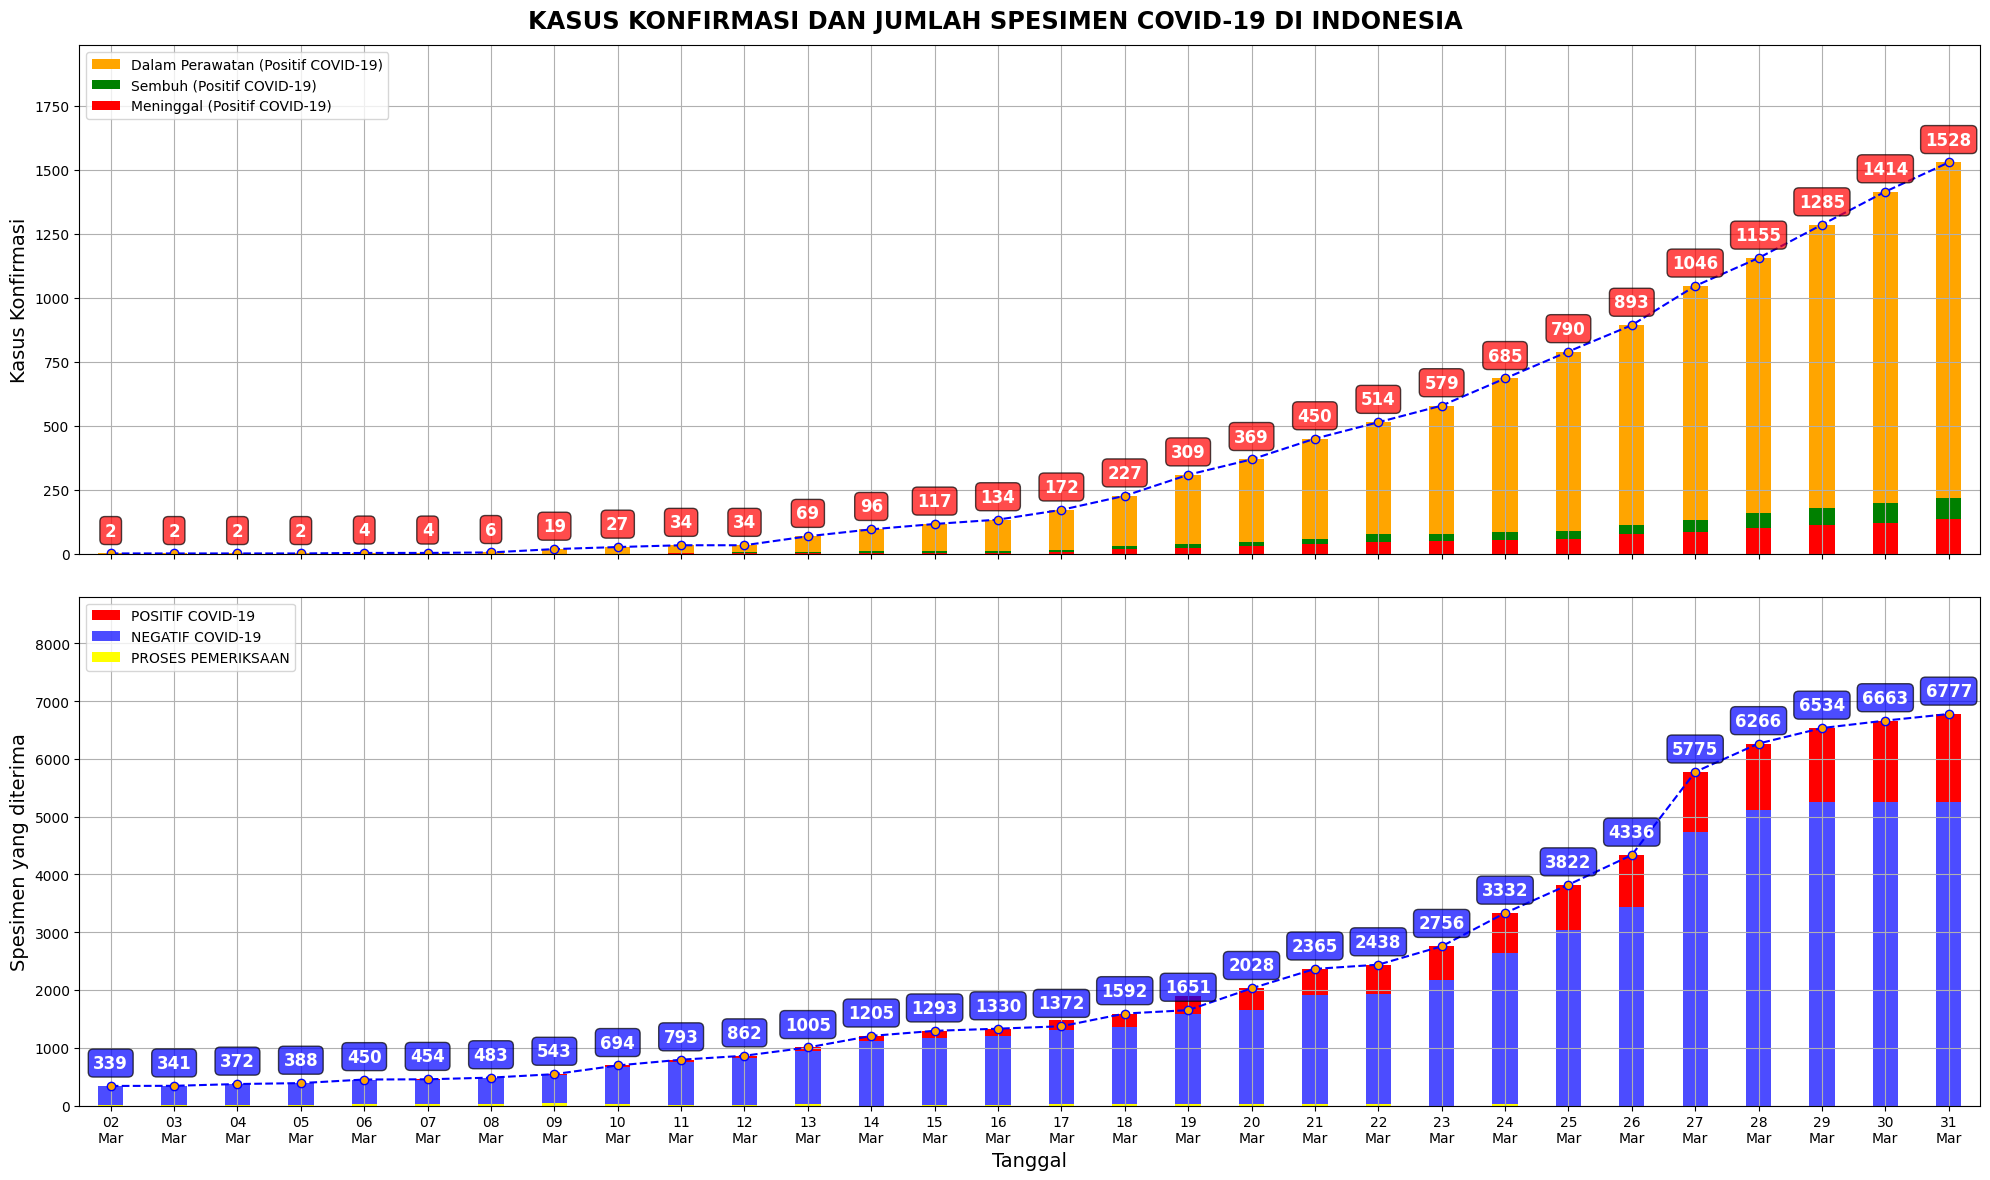

In [ ]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=FIG_SIZE_GROUP, sharex=True,
    gridspec_kw={'height_ratios':[1, 1]})

_DATASET = dataset_inkovis

inkovis.plot_confirmed_case(
    dataset=DATASET, ax=ax[0], mask=MASK, days=DAYS,
    show_diff_bar=False, show_info=False, show_hist=False, show_title=False
)

inkovis.plot_testing_case(
    dataset=DATASET, ax=ax[1], mask=MASK, days=DAYS,
    show_diff_bar=False, show_info=False, show_hist=False, show_title=False
)

fig.suptitle("KASUS KONFIRMASI DAN JUMLAH SPESIMEN COVID-19 DI INDONESIA", fontweight='bold', fontsize='xx-large')
fig.subplots_adjust(top=0.95)

ax[0].set_xlabel('');
plt.savefig('KONFIRMASI_SPESIMEN_HARIAN.png', dpi=150)

PERUBAHAN/PERKEMBANGAN

PERKEMBANGAN KASUS KONFIRMASI DAN JUMLAH SPESIMEN

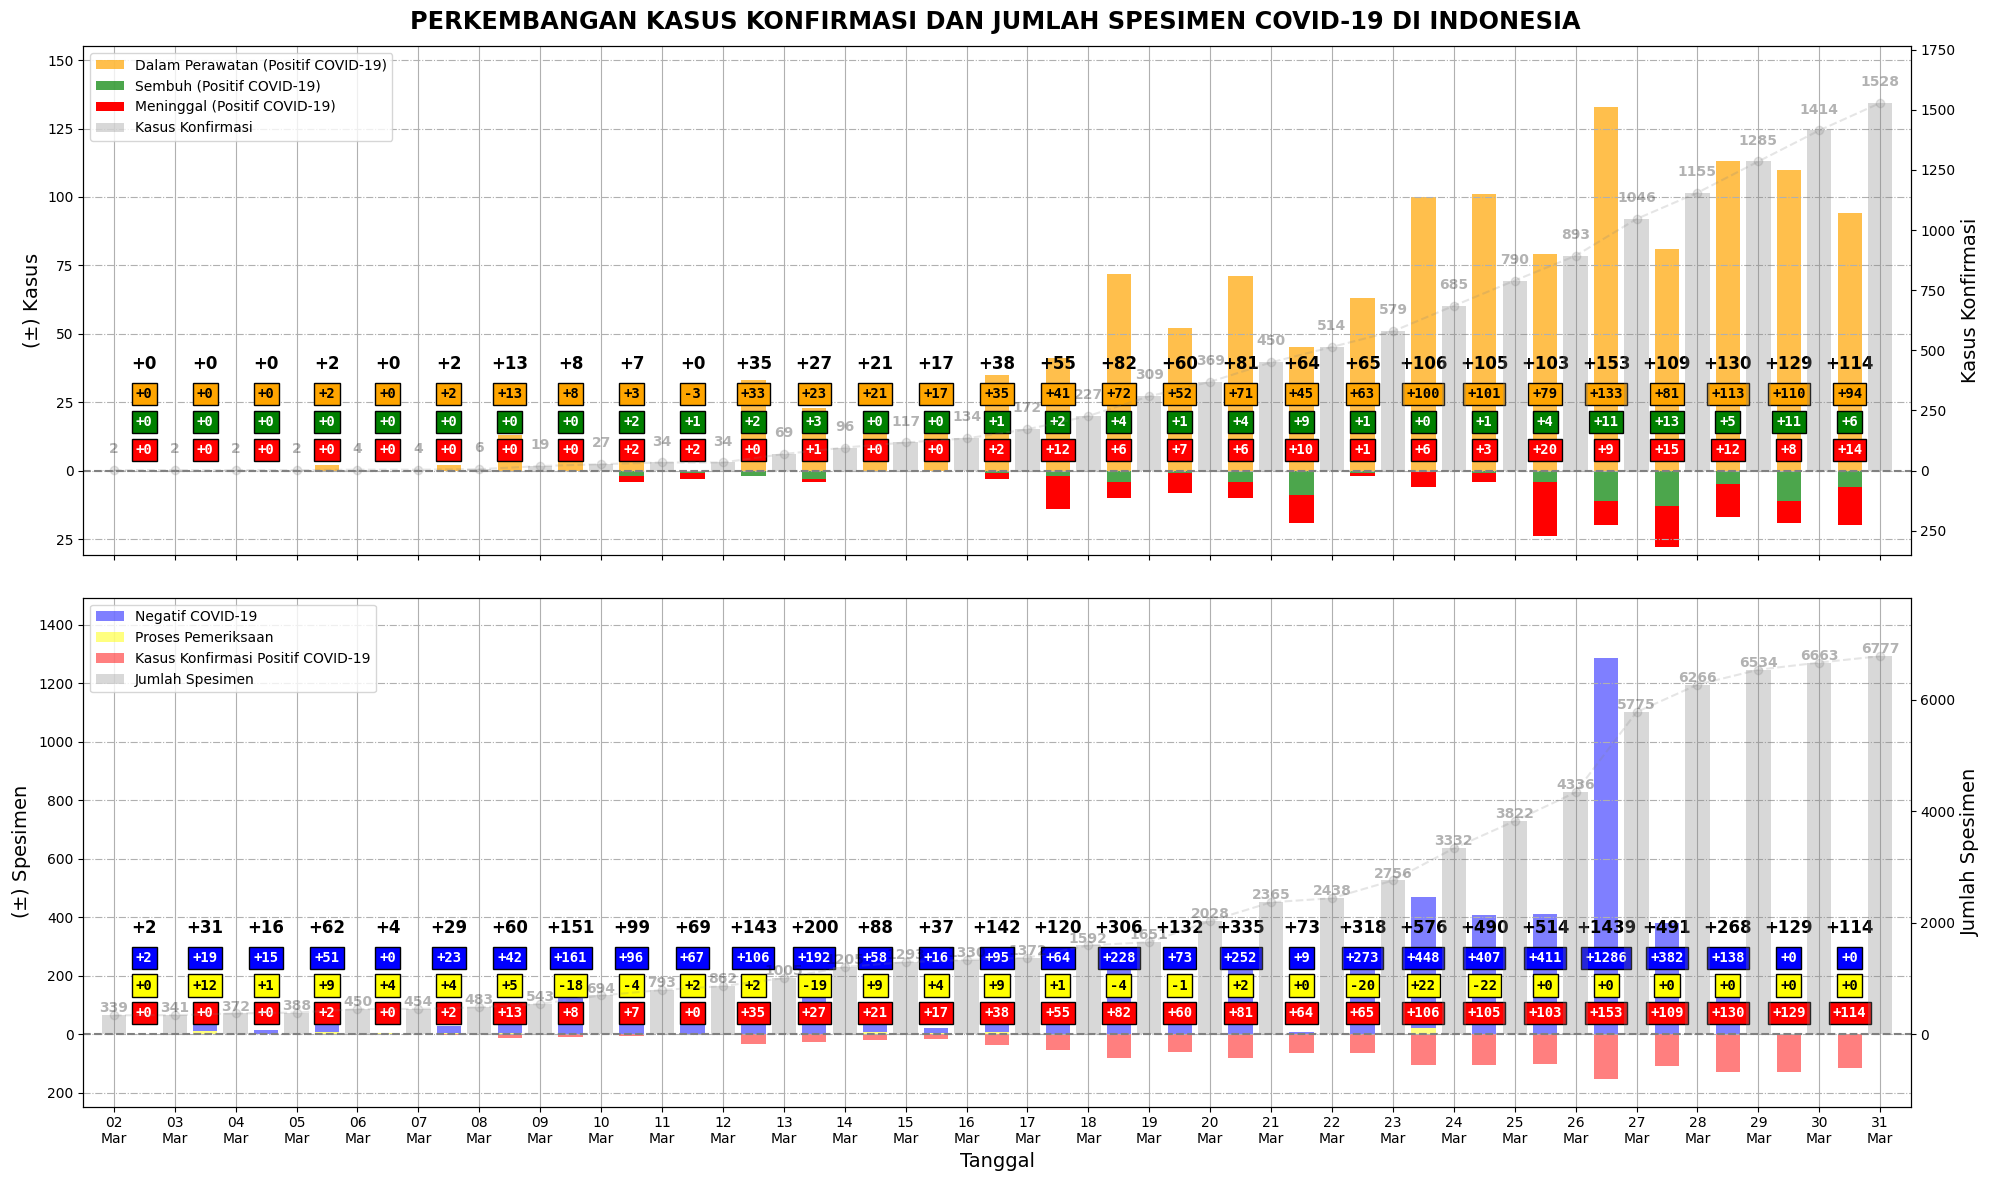

In [ ]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=FIG_SIZE_GROUP, sharex=True,
    gridspec_kw={'height_ratios':[1, 1]})

_DATASET = dataset_inkovis

inkovis.plot_confirmed_growth(
    dataset=DATASET, ax=ax[0], mask=MASK, days=DAYS,
    show_bar=True, show_confirmed=True, 
    show_numbers=True,
    show_total_numbers=True, show_title=False, show_info=False,
)
inkovis.plot_testing_growth(
    dataset=DATASET, ax=ax[1], mask=MASK, days=DAYS,
    show_bar=True, show_confirmed=True, 
    show_numbers=True,
    show_total_numbers=True, show_title=False, show_info=False,
)

fig.suptitle("PERKEMBANGAN KASUS KONFIRMASI DAN JUMLAH SPESIMEN COVID-19 DI INDONESIA", fontweight='bold', fontsize='xx-large')
fig.subplots_adjust(top=0.95)

ax[0].set_xlabel('');
plt.savefig('KONFIRMASI_SPESIMEN_PERKEMBANGAN_HARIAN.png', dpi=150)